In [1]:
#pip install --upgrade anaconda

In [2]:
#pip install --upgrade tensorflow

In [3]:
import tensorflow as tf

2024-07-27 10:04:52.586641: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#module of opencvc-python
import cv2 

In [5]:
from tensorflow import keras

In [6]:
from tensorflow.keras import layers, Input

In [7]:
from keras.layers import InputLayer, MaxPooling2D , Flatten , Dense , Conv2D , Dropout

In [8]:
from keras.losses import BinaryCrossentropy

In [9]:
from tensorflow.keras.models import Sequential , Model

In [10]:
from tensorflow.keras.preprocessing import image 

In [11]:
from tensorflow.keras.applications.resnet50 import preprocess_input , decode_predictions, ResNet50

In [12]:
from tensorflow.keras.optimizers import Adam, SGD

In [13]:
# SKlearn Unit 
from sklearn.utils import shuffle

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from PIL.Image import open

In [16]:
#Matplotlib Unit 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [17]:
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
import numpy as np
import pandas as pd
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline


csv_file = 'Brain Tumor.csv' 
df = pd.read_csv(csv_file)
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [20]:
pwd

'/Users/san5h0llow/Data_Science/Brain_tumar/archive'

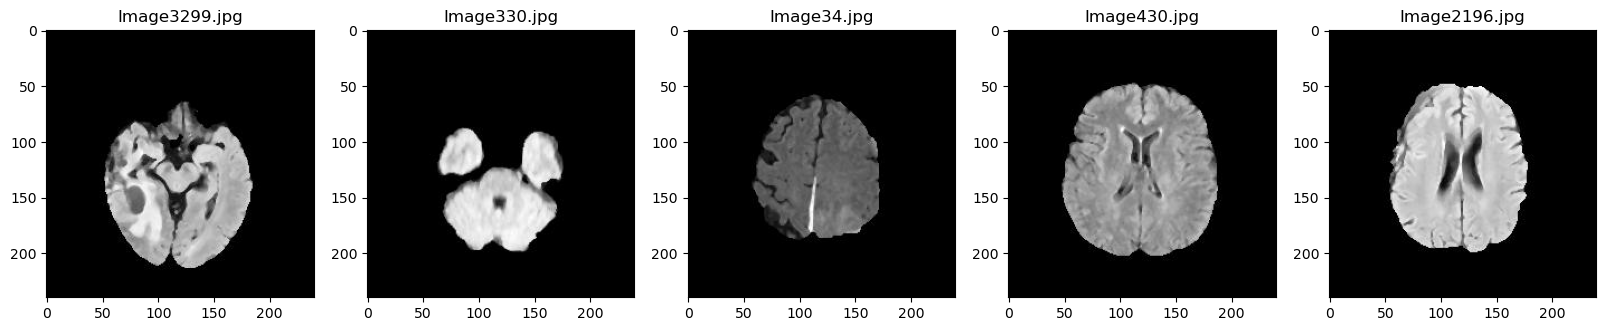

In [21]:
plt.figure(figsize=(20,20))
data_folder="/Users/san5h0llow/Data_Science/Brain_tumar/archive/Brain Tumor/Brain Tumor" 
for i in range(5):
    file = random.choice(os.listdir(data_folder))
    image_path= os.path.join(data_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [22]:
img.shape

(240, 240, 3)

In [23]:
level= ['Mean','Variance','Standard Deviation','Entropy','Skewness','Kurtosis','Contrast','Energy','ASM','Homogeneity','Dissimilarity','Correlation','Coarseness']
df[level] = StandardScaler().fit_transform(df[level])
df.head()

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,Image4,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,Image5,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168


/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_ca

Text(0.5, 1.0, 'Distribution of image Homogenity by Class')

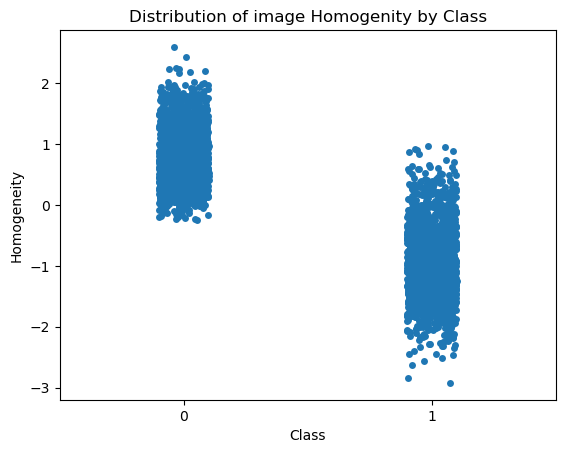

In [24]:
###Datacorelation
import seaborn as sns
sns.stripplot(x=df['Class'] , y = df['Homogeneity'])
plt.title('Distribution of image Homogenity by Class')

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



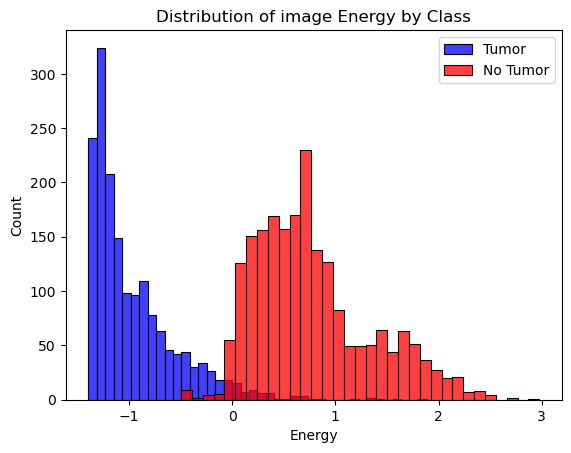

In [25]:
tumar = df['Class'] == 1
non_tumar = df['Class'] == 0
data = df.copy()
data = df.drop('Image', axis=1, inplace = False)
sns.histplot(data[tumar]['Energy'],label = "Tumor",color="blue")
sns.histplot(data[non_tumar]['Energy'],label = "No Tumor",color="red")
plt.title("Distribution of image Energy by Class")
plt.legend()
plt.show()

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/san5h0llow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



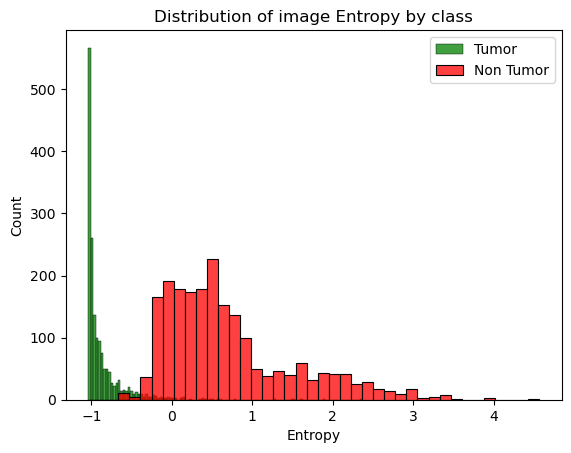

In [26]:
sns.histplot(data[tumar]['Entropy'],label = "Tumor", color = "green")
sns.histplot(data[non_tumar]['Entropy'],label = "Non Tumor", color = "red")
plt.title("Distribution of image Entropy by class")
plt.legend()

In [27]:
IMAGE_DATASET = "/Users/san5h0llow/Data_Science/Brain_tumar/archive/Brain Tumor/Brain Tumor"
IMAGE_DATASET_RAW = r"/Users/san5h0llow/Data_Science/Brain_tumar/archive/Brain Tumor/Brain Tumor"
CURRENT_FOLDER = "/Users/san5h0llow/Data_Science/Brain_tumar/archive"
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 50

In [28]:
data_ = pd.DataFrame()
data_["Image"] = df["Image"]
data_["Class"] = df["Class"]
path_list = []
for img_path in os.listdir(IMAGE_DATASET):
    path_list.append(os.path.join(IMAGE_DATASET,img_path))
path_dict = {os.path.splitext(os.path.basename(x))[0]:x for x in path_list}
data_["paths"] = df["Image"].map(path_dict.get)
data_["pixels"] = data_["paths"].map(lambda x:np.asarray(open(x).resize((IMG_HEIGHT,IMG_WIDTH))))
data_.head()

,Image,Class,paths,pixels
0,Image1,0,/Users/san5h0llow/Data_Science/Brain_tumar/arc...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/Users/san5h0llow/Data_Science/Brain_tumar/arc...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/Users/san5h0llow/Data_Science/Brain_tumar/arc...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/Users/san5h0llow/Data_Science/Brain_tumar/arc...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/Users/san5h0llow/Data_Science/Brain_tumar/arc...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [29]:
image_list = []
for i in range(len(data_)):
    brain_image = data_["pixels"][i].astype(np.float32)
    brain_image /=255
    image_list.append(brain_image)
X = np.array(image_list)
print(X.shape)

(3762, 224, 224, 3)


In [30]:
y = np.array(data_.Class)
y.shape

(3762,)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("The shape of the X_train: "+str(X_train.shape))
print("The size of the X_trian: "+str(X_train.shape[0]))
print("The size of the X_test: "+str(X_test.shape))
print("The size of the X_test: "+str(X_test.shape[0]))

The shape of the X_train: (3009, 224, 224, 3)
The size of the X_trian: 3009
The size of the X_test: (753, 224, 224, 3)
The size of the X_test: 753


In [32]:
def model(input_shape):
    model = Sequential()
    model.add(Input(shape = input_shape))
    model.add(Conv2D(16, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(16, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = 'same'))
    model.add(Conv2D(32, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(32, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = 'same'))
    model.add(Conv2D(64, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(Conv2D(64, kernel_size = 3, strides=(2,2),padding="same", activation = "relu", kernel_initializer = "he_normal"))
    model.add(MaxPooling2D(pool_size = (2,2),data_format="channels_last", padding = "same"))
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    return model

In [33]:
model = model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,745 (475.57 KB)

 Trainable params: 121,745 (475.57 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
optimizer = SGD(learning_rate = 0.01)
loss_fn = BinaryCrossentropy(from_logits = True)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = 10, validation_data=(X_test,y_test))

Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 32s 98ms/step - accuracy: 0.6375 - loss: 0.6337 - val_accuracy: 0.7756 - val_loss: 0.4887
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.7697 - loss: 0.5108 - val_accuracy: 0.8141 - val_loss: 0.4302
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 28s 95ms/step - accuracy: 0.7837 - loss: 0.4634 - val_accuracy: 0.8526 - val_loss: 0.3628
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.8280 - loss: 0.4035 - val_accuracy: 0.8526 - val_loss: 0.3201
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - accuracy: 0.8583 - loss: 0.3356 - val_accuracy: 0.8818 - val_loss: 0.2868
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.8649 - loss: 0.3081 - val_accuracy: 0.8738 - val_loss: 0.2782
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.8795 - loss: 0.2883 - val_accuracy: 0.9256 - val_loss: 0.2580
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.8919 - loss: 0.2533 - 

301/301 ━━━━━━━━━━━━━━━━━━━━ 26s 85ms/step - accuracy: 0.9809 - loss: 0.0696 - val_accuracy: 0.9801 - val_loss: 0.0829


In [37]:
model.save("BrainTumorv7new.h5")

In [39]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


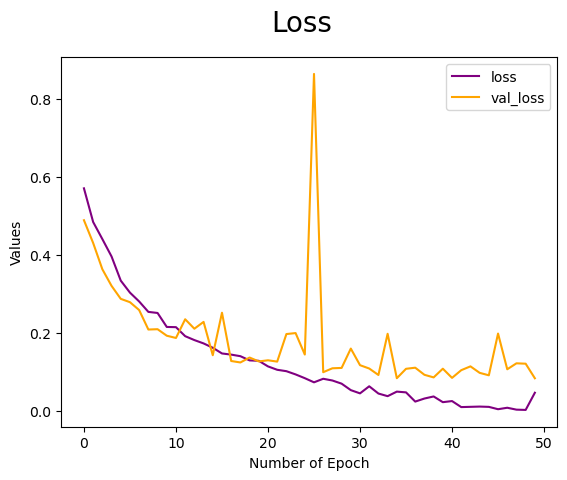

In [43]:
fig = plt.figure()
plt.plot(history.history['loss'], color='purple', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('Number of Epoch')
plt.ylabel('Values')
plt.show()

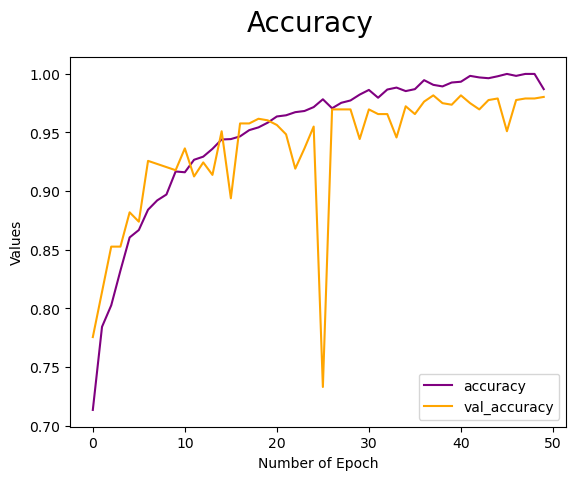

In [44]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='purple', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right")
plt.xlabel('Number of Epoch')
plt.ylabel('Values')
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


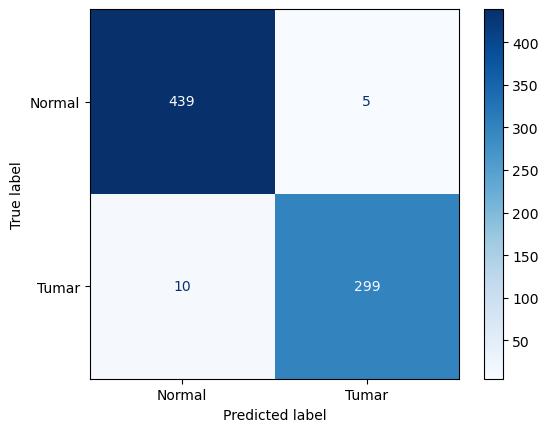

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = (model.predict(X_test)>0.5).astype(int)
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Normal','Tumar'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       444
           1       0.98      0.97      0.98       309

    accuracy                           0.98       753
   macro avg       0.98      0.98      0.98       753
weighted avg       0.98      0.98      0.98       753

